In [1]:
!pip install ipyleaflet
!jupyter nbextension enable --py --sys-prefix ipyleaflet

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
Enabling notebook extension jupyter-leaflet/extension...
      - Validating: ok


In [2]:
from math import *
import numpy as np
import pandas as pd
from datetime import datetime
from pathlib import Path
from IPython.display import display, HTML
import seaborn as sns
sns.set_style('white')


# colormap definitions
from matplotlib import cm 

%matplotlib inline
import matplotlib.pyplot as plt

import string
import openpyxl
import xlrd
import csv

In [3]:
path1 = Path("../downloads//Road/ACCIDENT.csv")
path2 = Path("../downloads//Road/ACCIDENT_LOCATION.csv")
path3 = Path("../downloads//Road/NODE.csv")
df1 = pd.read_csv(path1, skiprows=0)
df2 = pd.read_csv(path2, skiprows=0)
df3 = pd.read_csv(path3, skiprows=0)

In [4]:
df = pd.merge(pd.merge(df1, df2, on='ACCIDENT_NO'), df3, on='ACCIDENT_NO')
del df['NEAREST_KM_POST']
del df['OFF_ROAD_LOCATION']
del df['PAGE']
len(df)

55164

In [5]:
len(df[(df['SPEED_ZONE']==777)])

70

In [6]:
df=df[(df['SPEED_ZONE']!=777)]
df['SPEED_ZONE']=df['SPEED_ZONE'].replace(999, 50) #around average speed zone (assumed)
df['SPEED_ZONE']=df['SPEED_ZONE'].replace(888, 100) #Average county road speed

In [7]:
df.dtypes

ACCIDENT_NO              object
ACCIDENTDATE             object
ACCIDENTTIME             object
ACCIDENT_TYPE             int64
Accident Type Desc       object
DAY_OF_WEEK               int64
Day Week Description     object
DCA_CODE                  int64
DCA Description          object
DIRECTORY                object
EDITION                  object
GRID_REFERENCE_X         object
GRID_REFERENCE_Y         object
LIGHT_CONDITION           int64
Light Condition Desc     object
NODE_ID_x                 int64
NO_OF_VEHICLES            int64
NO_PERSONS                int64
NO_PERSONS_INJ_2          int64
NO_PERSONS_INJ_3          int64
NO_PERSONS_KILLED         int64
NO_PERSONS_NOT_INJ        int64
POLICE_ATTEND             int64
ROAD_GEOMETRY             int64
Road Geometry Desc       object
SEVERITY                  int64
SPEED_ZONE                int64
NODE_ID_y                 int64
ROAD_ROUTE_1            float64
ROAD_NAME                object
ROAD_TYPE                object
ROAD_NAM

In [8]:
df.corr().style.background_gradient(cmap='BuPu')

,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,LIGHT_CONDITION,NODE_ID_x,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,SEVERITY,SPEED_ZONE,NODE_ID_y,ROAD_ROUTE_1,DISTANCE_LOCATION,NODE_ID,AMG_X,AMG_Y,Lat,Long,Postcode No
ACCIDENT_TYPE,1,-0.0137095,0.73447,0.0620191,0.261547,-0.583022,-0.363963,0.0912641,-0.171824,0.0138458,-0.35987,0.0611554,0.266391,-0.123714,0.170363,0.261547,0.0871675,0.271295,0.261547,0.0465912,0.107684,0.109681,0.0468937,0.238199
DAY_OF_WEEK,-0.0137095,1,-0.0173065,0.0163268,-0.00768846,0.0121521,0.0154197,0.017247,-0.00465653,0.0120311,0.0117274,-0.00317504,-0.00591151,-0.0197909,-0.011265,-0.00768846,0.0109941,-0.00982178,-0.00768846,-0.000701466,0.000188432,0.000267121,-0.000494757,-0.00526918
DCA_CODE,0.73447,-0.0173065,1,0.0839537,0.409329,-0.3736,-0.337357,0.0704668,-0.138129,0.016044,-0.339478,0.0348924,0.434043,-0.0936468,0.247828,0.409329,0.0354599,0.287607,0.409329,0.0436734,0.0918011,0.0937416,0.0438311,0.234274
LIGHT_CONDITION,0.0620191,0.0163268,0.0839537,1,0.0371592,-0.0940283,-0.0678373,0.00932688,-0.0384514,0.0266924,-0.0626967,0.102421,0.0378511,-0.0206839,0.0267707,0.0371592,0.0003705,0.0173684,0.0371592,-0.0133995,0.00208811,0.0019086,-0.0135156,-0.00602635
NODE_ID_x,0.261547,-0.00768846,0.409329,0.0371592,1,-0.136092,-0.111452,0.0748117,-0.0807558,0.0428788,-0.118637,-0.016376,0.761571,-0.0956958,0.228636,1,-0.0445857,0.260574,1,0.0167689,0.0597343,0.0611992,0.0168041,0.180846
NO_OF_VEHICLES,-0.583022,0.0121521,-0.3736,-0.0940283,-0.136092,1,0.51911,-0.0693729,0.205356,-0.0252868,0.509893,-0.0331556,-0.129677,0.122709,-0.0609917,-0.136092,-0.129418,-0.177089,-0.136092,-0.0140859,-0.0939256,-0.0956188,-0.014351,-0.185998
NO_PERSONS,-0.363963,0.0154197,-0.337357,-0.0678373,-0.111452,0.51911,1,0.0780938,0.379631,0.0311175,0.88994,-0.0944864,-0.116683,0.0297571,0.0132648,-0.111452,-0.102385,-0.101086,-0.111452,-0.0245399,-0.0382276,-0.0388236,-0.0246767,-0.0638548
NO_PERSONS_INJ_2,0.0912641,0.017247,0.0704668,0.00932688,0.0748117,-0.0693729,0.0780938,1,-0.489131,0.0501758,-0.0741894,-0.115192,0.0759626,-0.790656,0.131525,0.0748117,-0.00476856,0.0740453,0.0748117,-0.0103943,0.0260742,0.0266996,-0.0107283,0.0731087
NO_PERSONS_INJ_3,-0.171824,-0.00465653,-0.138129,-0.0384514,-0.0807558,0.205356,0.379631,-0.489131,1,-0.107095,0.0936071,-0.00372775,-0.0928886,0.57948,-0.0103157,-0.0807558,-0.0423167,-0.0577478,-0.0807558,-0.0101115,-0.00675421,-0.00683866,-0.00981383,-0.0150111
NO_PERSONS_KILLED,0.0138458,0.0120311,0.016044,0.0266924,0.0428788,-0.0252868,0.0311175,0.0501758,-0.107095,1,-0.0360253,-0.0535422,0.0448846,-0.426767,0.110731,0.0428788,-0.0207861,0.0557523,0.0428788,-0.0122741,0.0402661,0.0408305,-0.0123145,0.0552148


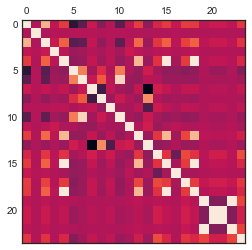

In [9]:
plt.matshow(df.corr())
plt.show()

In [10]:
corr=df.corr()
large= ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.5).any()
corr.loc[large,large]

,DAY_OF_WEEK,LIGHT_CONDITION,NO_PERSONS_KILLED,POLICE_ATTEND,SPEED_ZONE,ROAD_ROUTE_1,DISTANCE_LOCATION,Postcode No
DAY_OF_WEEK,1.000000,0.016327,0.012031,-0.003175,-0.011265,0.010994,-0.009822,-0.005269
LIGHT_CONDITION,0.016327,1.000000,0.026692,0.102421,0.026771,0.000370,0.017368,-0.006026
NO_PERSONS_KILLED,0.012031,0.026692,1.000000,-0.053542,0.110731,-0.020786,0.055752,0.055215
POLICE_ATTEND,-0.003175,0.102421,-0.053542,1.000000,-0.110227,0.038160,-0.003126,-0.038834
SPEED_ZONE,-0.011265,0.026771,0.110731,-0.110227,1.000000,-0.302716,0.321118,0.335043
ROAD_ROUTE_1,0.010994,0.000370,-0.020786,0.038160,-0.302716,1.000000,-0.036934,-0.005227
DISTANCE_LOCATION,-0.009822,0.017368,0.055752,-0.003126,0.321118,-0.036934,1.000000,0.244812
Postcode No,-0.005269,-0.006026,0.055215,-0.038834,0.335043,-0.005227,0.244812,1.000000


In [11]:
display(df.corr().unstack().abs().sort_values(ascending=False).drop_duplicates().nlargest(10),
        df.corr().unstack().sort_values(ascending=False).drop_duplicates().nlargest(10),
        df.corr().unstack().sort_values(ascending=True).drop_duplicates().nsmallest(10))

Postcode No         Postcode No       1.000000
AMG_Y               Lat               0.999916
AMG_X               Long              0.999867
NO_PERSONS_NOT_INJ  NO_PERSONS        0.889940
NO_PERSONS_INJ_2    SEVERITY          0.790656
ROAD_GEOMETRY       NODE_ID           0.761571
DCA_CODE            ACCIDENT_TYPE     0.734470
NO_OF_VEHICLES      ACCIDENT_TYPE     0.583022
NO_PERSONS_INJ_3    SEVERITY          0.579480
NO_PERSONS          NO_OF_VEHICLES    0.519110
dtype: float64

Postcode No         Postcode No       1.000000
AMG_Y               Lat               0.999916
AMG_X               Long              0.999867
NO_PERSONS_NOT_INJ  NO_PERSONS        0.889940
ROAD_GEOMETRY       NODE_ID_y         0.761571
DCA_CODE            ACCIDENT_TYPE     0.734470
NO_PERSONS_INJ_3    SEVERITY          0.579480
NO_OF_VEHICLES      NO_PERSONS        0.519110
NO_PERSONS_NOT_INJ  NO_OF_VEHICLES    0.509893
DCA_CODE            ROAD_GEOMETRY     0.434043
dtype: float64

SEVERITY            NO_PERSONS_INJ_2     -0.790656
ACCIDENT_TYPE       NO_OF_VEHICLES       -0.583022
NO_PERSONS_INJ_2    NO_PERSONS_INJ_3     -0.489131
SEVERITY            NO_PERSONS_KILLED    -0.426767
DCA_CODE            NO_OF_VEHICLES       -0.373600
ACCIDENT_TYPE       NO_PERSONS           -0.363963
                    NO_PERSONS_NOT_INJ   -0.359870
NO_PERSONS_NOT_INJ  DCA_CODE             -0.339478
DCA_CODE            NO_PERSONS           -0.337357
SPEED_ZONE          ROAD_ROUTE_1         -0.302716
dtype: float64

In [12]:
df['Hour']=df['ACCIDENTTIME'].apply(lambda s:s[0:2]).astype(int)
df['Minute']=df['ACCIDENTTIME'].apply(lambda s:('0' + s[2:5])).astype(float)
df['Time']=df['Minute']+df['Hour']

y=[]
for i in range(len(df)):
    if df['Time'].iloc[i] <= 8 and df['Time'].iloc[i]>5:
        y+=["Morning"]
    if df['Time'].iloc[i] <= 10 and df['Time'].iloc[i]>8:
        y+=["Late Morning"]        
    if df['Time'].iloc[i] <=14 and df['Time'].iloc[i]>10:
        y+=["Midday"]
    if df['Time'].iloc[i] <=16 and df['Time'].iloc[i]>14:
        y+=["Afternoon"]    
    if df['Time'].iloc[i] <= 20 and df['Time'].iloc[i]>16:
        y+=["Night"]
    if df['Time'].iloc[i] <= 24 and df['Time'].iloc[i]>20:
        y+=["Late Night"]
    if df['Time'].iloc[i] <= 5 and df['Time'].iloc[i]>=0:
        y+=["Early Morning"]

df['Time period']=y

In [13]:
df.dtypes

ACCIDENT_NO              object
ACCIDENTDATE             object
ACCIDENTTIME             object
ACCIDENT_TYPE             int64
Accident Type Desc       object
DAY_OF_WEEK               int64
Day Week Description     object
DCA_CODE                  int64
DCA Description          object
DIRECTORY                object
EDITION                  object
GRID_REFERENCE_X         object
GRID_REFERENCE_Y         object
LIGHT_CONDITION           int64
Light Condition Desc     object
NODE_ID_x                 int64
NO_OF_VEHICLES            int64
NO_PERSONS                int64
NO_PERSONS_INJ_2          int64
NO_PERSONS_INJ_3          int64
NO_PERSONS_KILLED         int64
NO_PERSONS_NOT_INJ        int64
POLICE_ATTEND             int64
ROAD_GEOMETRY             int64
Road Geometry Desc       object
SEVERITY                  int64
SPEED_ZONE                int64
NODE_ID_y                 int64
ROAD_ROUTE_1            float64
ROAD_NAME                object
ROAD_TYPE                object
ROAD_NAM

In [14]:
display(df.groupby('ACCIDENT_TYPE').agg({'SEVERITY':['mean', 'median'], 
                         'NO_PERSONS':'mean','NO_PERSONS_INJ_2':'mean','NO_PERSONS_INJ_3':'mean',
                                 'NO_PERSONS_NOT_INJ':'mean','NO_PERSONS_KILLED':'mean',
                                 'DCA_CODE':'median'}),
        df.groupby('ACCIDENT_TYPE').agg({'SEVERITY':['mean', 'median'], 'ROAD_GEOMETRY': 'median','LIGHT_CONDITION': 'median' }),
        df.groupby('SEVERITY').agg({'ACCIDENT_TYPE':['mean', 'median'], 
                         'NO_PERSONS':'mean','NO_PERSONS_INJ_2':'mean','NO_PERSONS_INJ_3':'mean',
                                 'NO_PERSONS_NOT_INJ':'mean','NO_PERSONS_KILLED':'mean',
                                 'DCA_CODE':'median'}),
        df.groupby('SEVERITY').agg({'ACCIDENT_TYPE':['mean', 'median'], 'ROAD_GEOMETRY': 'median','LIGHT_CONDITION': 'median' }),
        pd.crosstab(df['ACCIDENT_TYPE'],df['SEVERITY']),
        pd.crosstab(df['Light Condition Desc'],df['ROAD_GEOMETRY']))

SEVERITY        NO_PERSONS NO_PERSONS_INJ_2 NO_PERSONS_INJ_3  \
                   mean median       mean             mean             mean   
ACCIDENT_TYPE                                                                 
1              2.750820      3   2.832863         0.273965         1.040590   
2              2.551739      3   2.242799         0.406443         0.650096   
3              2.654321      3   1.386243         0.361552         0.758377   
4              2.514883      3   1.490174         0.473854         0.712792   
5              2.675351      3   1.464930         0.324649         0.757515   
6              2.627874      3   1.390445         0.397989         0.756466   
7              2.454183      2   2.446215         0.545817         0.513944   
8              2.642023      3   1.297489         0.357977         0.674213   
9              2.550000      3   1.700000         0.400000         0.625000   

              NO_PERSONS_NOT_INJ NO_PERSONS_KILLED DCA_CODE  
                            mean              mean   median  
ACCIDENT_TYPE                                                
1                       1.503944          0.013847      130  
2                       1.156603          0.029443      102  
3                       0.252205          0.014109      167  
4                       0.261694          0.041719      173  
5                       0.370741          0.012024      166  
6                       0.221624          0.012931      174  
7                       1.374502          0.011952      190  
8                       0.260700          0.003891      174  
9                       0.650000          0.025000      198

SEVERITY        ROAD_GEOMETRY LIGHT_CONDITION
                   mean median        median          median
ACCIDENT_TYPE                                               
1              2.750820      3             2             1.0
2              2.551739      3             5             1.0
3              2.654321      3             5             3.0
4              2.514883      3             5             1.0
5              2.675351      3             5             1.0
6              2.627874      3             5             1.0
7              2.454183      2             5             1.0
8              2.642023      3             5             1.0
9              2.550000      3             5             1.5

ACCIDENT_TYPE        NO_PERSONS NO_PERSONS_INJ_2 NO_PERSONS_INJ_3  \
                  mean median       mean             mean             mean   
SEVERITY                                                                     
1             2.485005    2.0   2.587384         0.492244         0.263702   
2             2.676748    2.0   2.283078         1.134171         0.209906   
3             2.086323    1.0   2.426969         0.000208         1.216055   
4             4.500000    4.5   4.000000         0.000000         0.000000   

         NO_PERSONS_NOT_INJ NO_PERSONS_KILLED DCA_CODE  
                       mean              mean   median  
SEVERITY                                                
1                  0.746639           1.08273    135.0  
2                  0.938745           0.00000    136.0  
3                  1.210187           0.00000    130.0  
4                  4.000000           0.00000    147.5

ACCIDENT_TYPE        ROAD_GEOMETRY LIGHT_CONDITION
                  mean median        median          median
SEVERITY                                                   
1             2.485005    2.0           5.0               1
2             2.676748    2.0           5.0               1
3             2.086323    1.0           4.0               1
4             4.500000    4.5           4.5               2

SEVERITY,1,2,3,4
ACCIDENT_TYPE,,,,
1,437,7783,26517,1
2,136,1829,2722,0
3,8,180,379,0
4,335,3551,4815,0
5,4,154,341,0
6,32,972,1780,0
7,3,131,117,0
8,11,991,1824,1
9,1,16,23,0


ROAD_GEOMETRY,1,2,3,4,5,6,7,8,9
Light Condition Desc,,,,,,,,,
Dark No street lights,125,318,2,25,2525,2,0,0,3
Dark Street lights off,19,20,0,2,74,0,0,0,0
Dark Street lights on,2395,2064,8,271,3618,16,0,0,5
Dark Street lights unknown,120,132,1,11,295,3,0,0,0
Day,7664,8346,66,796,18142,36,2,1,60
Dusk/Dawn,1534,1641,9,135,3249,7,1,1,5
Unknown,358,312,1,30,640,2,0,0,2


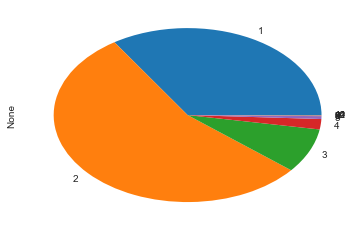

In [15]:
df.groupby('NO_OF_VEHICLES').size().plot.pie()

[None, None, None, None, None, None, None, None]

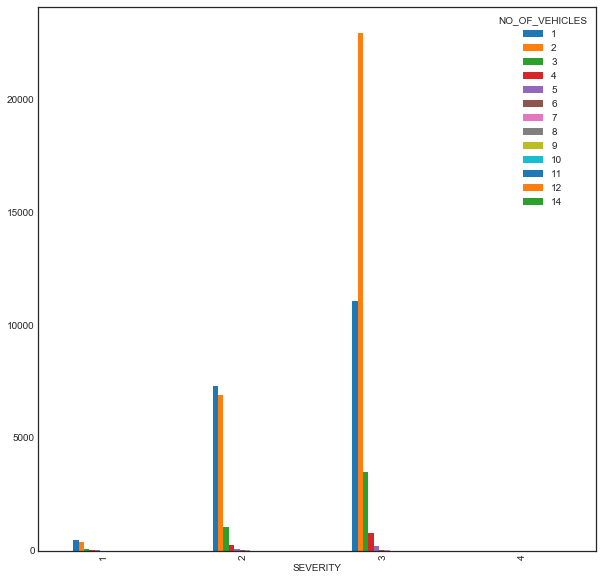

In [16]:

axx=pd.crosstab(df['SEVERITY'],df['NO_OF_VEHICLES']).plot.bar(figsize=(10,10))
plt.setp(axx.xaxis.get_majorticklabels(), ha='right')

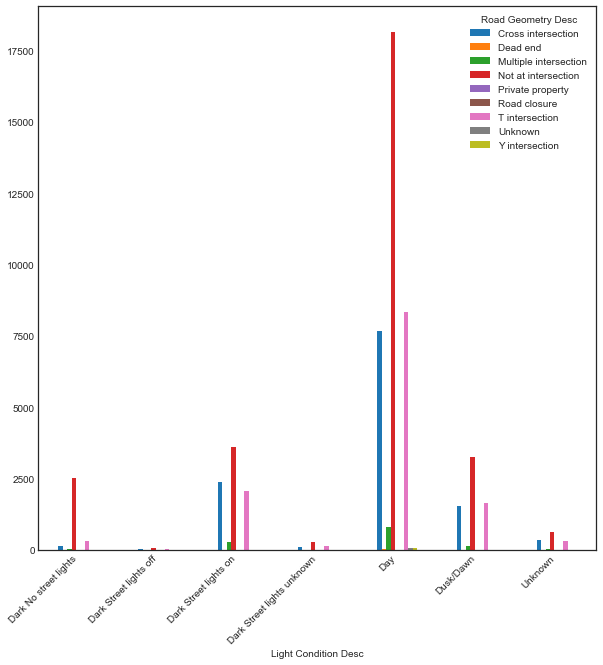

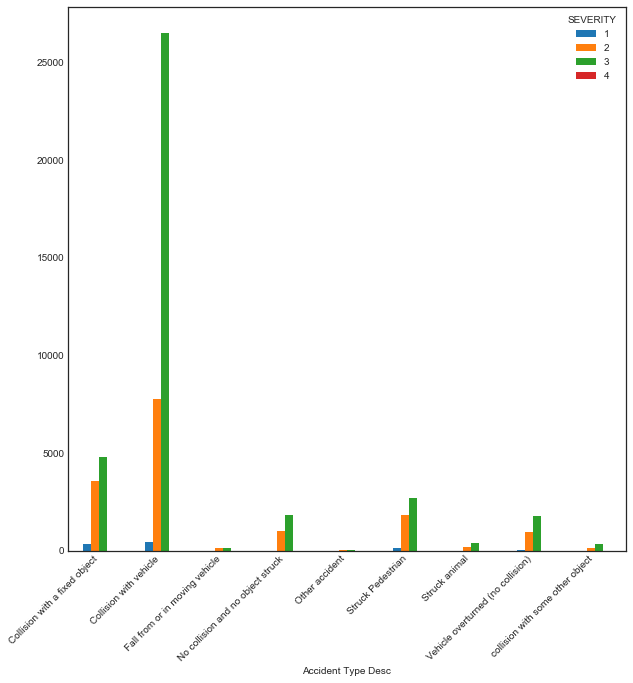

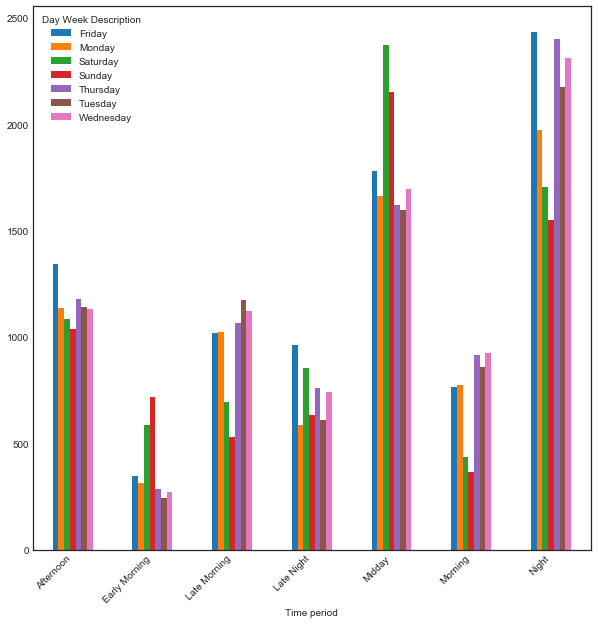

In [17]:
ax1=pd.crosstab(df['Light Condition Desc'],df['Road Geometry Desc']).plot.bar(figsize=(10,10), rot= 45)
ax2=pd.crosstab(df['Accident Type Desc'],df['SEVERITY']).plot.bar(figsize=(10,10), rot = 45)
ax3=pd.crosstab(df['Time period'],df['Day Week Description']).plot.bar(figsize=(10,10), rot = 45)
plt.setp(ax3.xaxis.get_majorticklabels(), ha='right')
plt.setp(ax1.xaxis.get_majorticklabels(), ha='right')
plt.setp(ax2.xaxis.get_majorticklabels(), ha='right')
plt.show()

DCA_CODE
130    9899
121    4851
110    3733
171    3092
113    2577
174    2500
173    2177
100    1847
120    1745
181    1670
dtype: int64

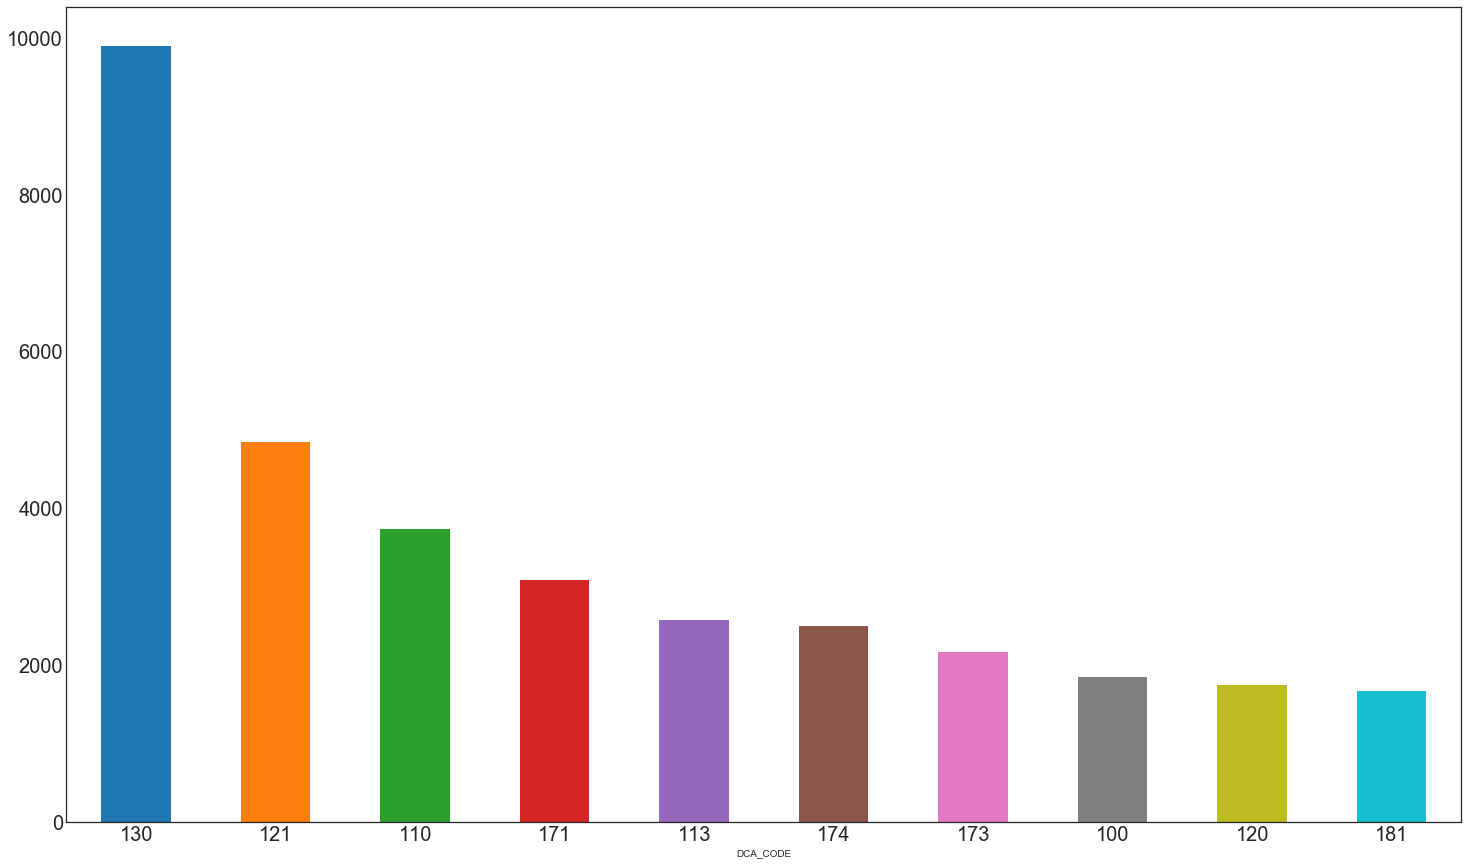

In [18]:
display(df.groupby('DCA_CODE').size().nlargest(10)),

dca= df.groupby('DCA_CODE').size().nlargest(10).plot.bar(figsize=(25,15),
                                                    rot= 0, 
                                                    fontsize = 20)
dca.title.set_size(40)
# percent of total accidents overlayed

In [19]:
dca_groupby=df[(df['DCA_CODE'].isin(list(df.groupby('DCA_CODE').size().nlargest(10).keys())))]

display(df.groupby('DCA_CODE').size().nlargest(10).agg(lambda x: x/len(df)).astype(float).map("{:.2%}".format),

df.groupby('DCA_CODE').size().nlargest(10).sum()/len(df))

DCA_CODE
130    17.97%
121     8.80%
110     6.78%
171     5.61%
113     4.68%
174     4.54%
173     3.95%
100     3.35%
120     3.17%
181     3.03%
dtype: object

0.6187788143899517

In [20]:
df[(df['DCA_CODE'].isin(list(df.groupby('DCA_CODE').size().nlargest(20).keys())))].groupby('ROAD_TYPE').size().nlargest(5)


ROAD_TYPE
ROAD       20638
STREET      9240
HIGHWAY     3861
            3209
FREEWAY     1550
dtype: int64

In [21]:
df.groupby('SPEED_ZONE').size().agg(lambda x: x/len(df)*100).sort_values()

SPEED_ZONE
75      0.014521
30      0.152467
90      0.348495
110     1.087233
40      5.946201
70      6.697644
80     14.266526
100    15.791193
50     22.396268
60     33.299452
dtype: float64

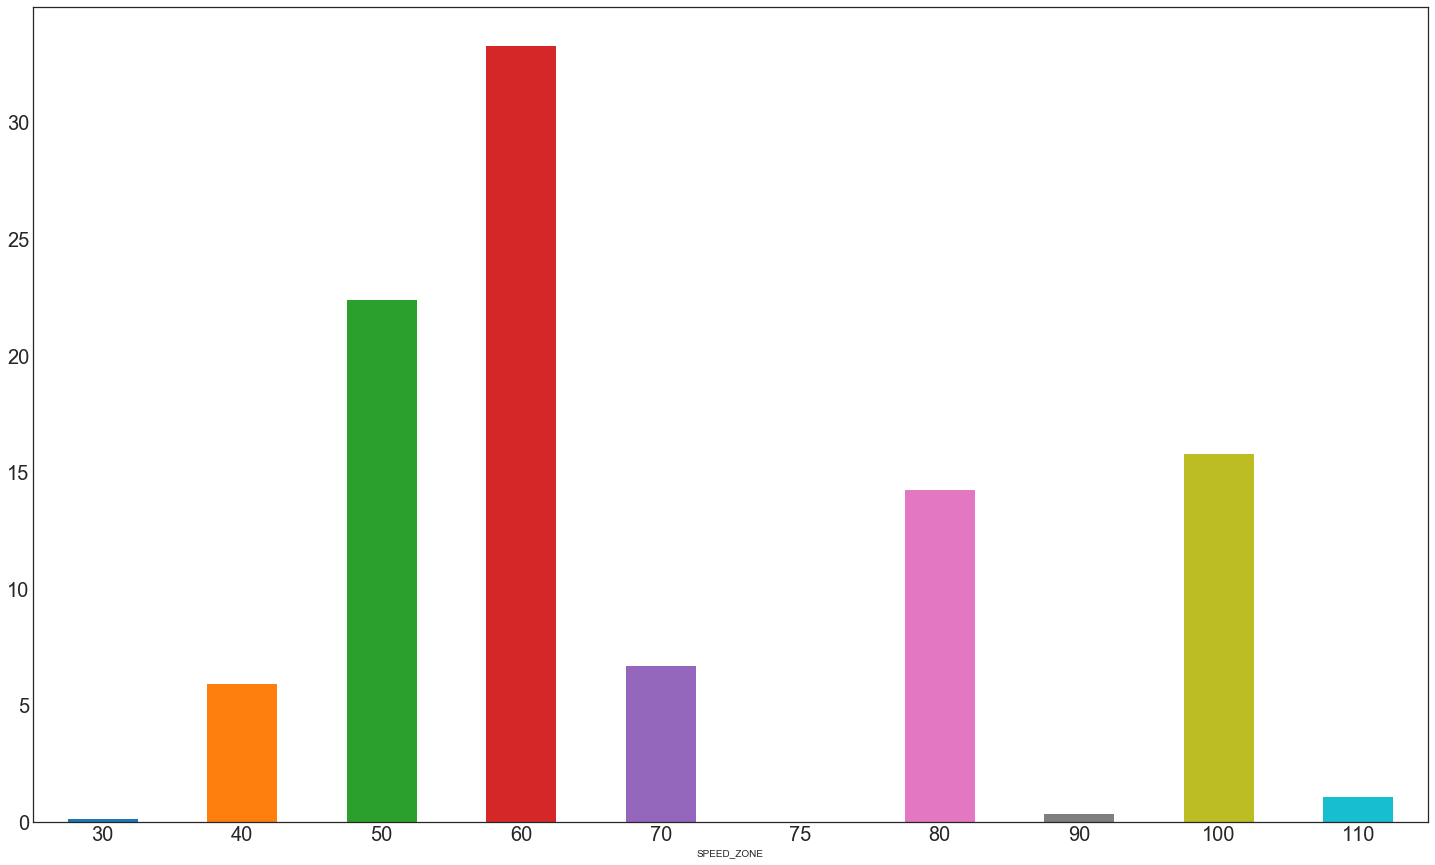

In [22]:
df.groupby('SPEED_ZONE').size().agg(lambda x: x/len(df)*100).plot.bar(figsize=(25,15), rot= 0, fontsize = 20)

SPEED_ZONE
30        84
40      3276
50     12339
60     18346
70      3690
75         8
80      7860
90       192
100     8700
110      599
dtype: int64

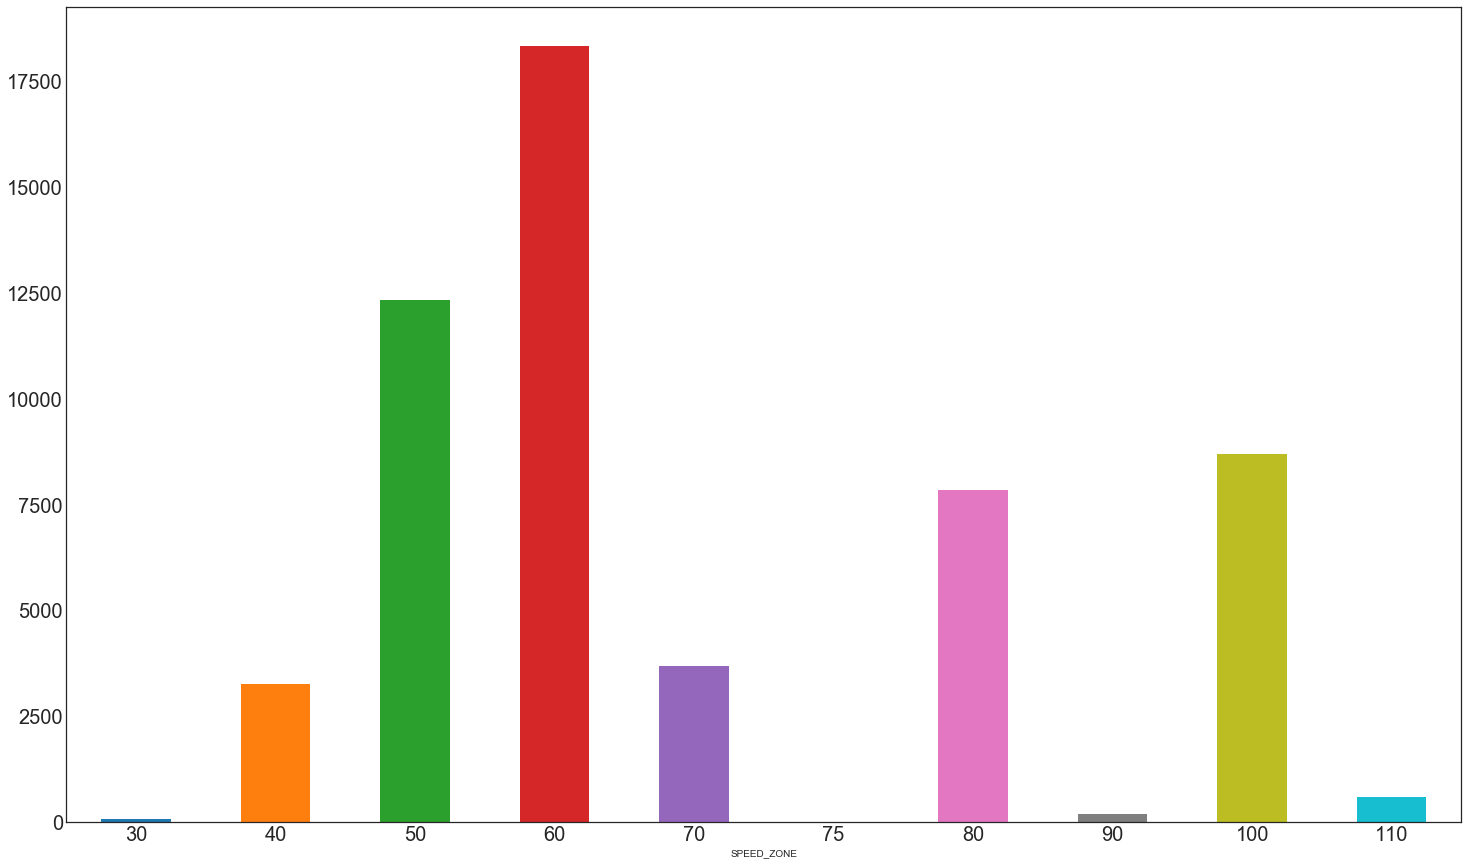

In [23]:
display(df.groupby('SPEED_ZONE').size(),
        
df.groupby('SPEED_ZONE').size().plot.bar(figsize=(25,15), rot= 0, fontsize = 20))

In [24]:
df.groupby('Time period').agg({'ACCIDENT_TYPE':['mean', 'median'],'SEVERITY':['mean', 'median'],
                               'ROAD_GEOMETRY': 'median','LIGHT_CONDITION': 'median' })


ACCIDENT_TYPE         SEVERITY        ROAD_GEOMETRY  \
                       mean median      mean median        median   
Time period                                                         
Afternoon          2.214197      1  2.685654      3             5   
Early Morning      3.138167      4  2.512626      3             5   
Late Morning       2.054466      1  2.740646      3             3   
Late Night         2.510572      1  2.628710      3             5   
Midday             2.453571      1  2.697050      3             5   
Morning            2.146366      1  2.676372      3             5   
Night              1.993540      1  2.691726      3             4   

              LIGHT_CONDITION  
                       median  
Time period                    
Afternoon                   1  
Early Morning               3  
Late Morning                1  
Late Night                  3  
Midday                      1  
Morning                     2  
Night                       2

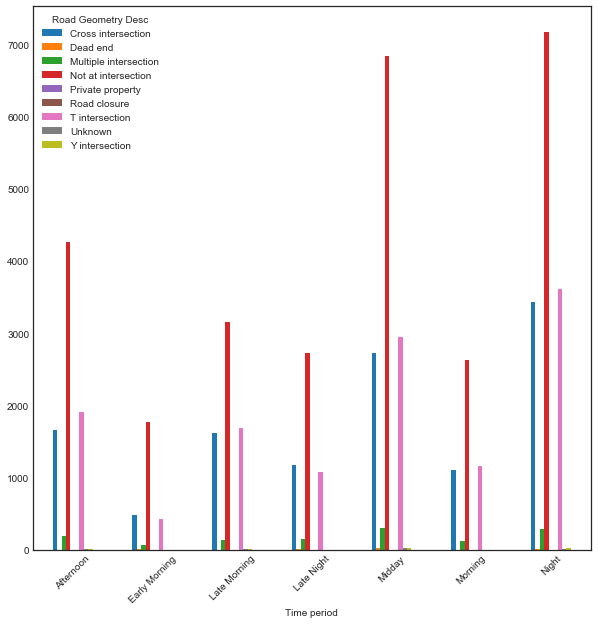

In [25]:
ax1=pd.crosstab(df['Time period'],df['Road Geometry Desc']).plot.bar(figsize=(10,10), rot= 45)

In [26]:
df.groupby('Time period').size().sort_values(ascending = False)

Time period
Night            14552
Midday           12880
Afternoon         8058
Late Morning      6628
Late Night        5155
Morning           5049
Early Morning     2772
dtype: int64

In [27]:
from ipyleaflet import (Map, DrawControl, Heatmap)

In [28]:
print(df[["Lat","Long"]].max(),'\n\n',df[["Lat","Long"]].min(),'\n\n',df[["Lat","Long"]].mean())


Lat     -34.12767
Long    149.75747
dtype: float64 

 Lat     -39.02399
Long    140.96648
dtype: float64 

 Lat     -37.706975
Long    144.972306
dtype: float64


In [29]:
df.dtypes

ACCIDENT_NO              object
ACCIDENTDATE             object
ACCIDENTTIME             object
ACCIDENT_TYPE             int64
Accident Type Desc       object
DAY_OF_WEEK               int64
Day Week Description     object
DCA_CODE                  int64
DCA Description          object
DIRECTORY                object
EDITION                  object
GRID_REFERENCE_X         object
GRID_REFERENCE_Y         object
LIGHT_CONDITION           int64
Light Condition Desc     object
NODE_ID_x                 int64
NO_OF_VEHICLES            int64
NO_PERSONS                int64
NO_PERSONS_INJ_2          int64
NO_PERSONS_INJ_3          int64
NO_PERSONS_KILLED         int64
NO_PERSONS_NOT_INJ        int64
POLICE_ATTEND             int64
ROAD_GEOMETRY             int64
Road Geometry Desc       object
SEVERITY                  int64
SPEED_ZONE                int64
NODE_ID_y                 int64
ROAD_ROUTE_1            float64
ROAD_NAME                object
ROAD_TYPE                object
ROAD_NAM

In [30]:
df.groupby('ROAD_NAME').size().nlargest(5)

ROAD_NAME
                   4309
PRINCES            1262
HIGH                783
NEPEAN              537
SOUTH GIPPSLAND     426
dtype: int64

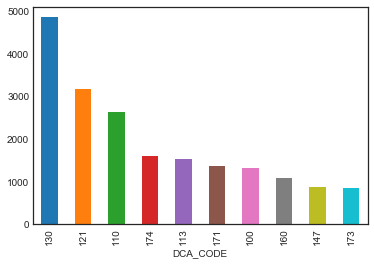

In [31]:
df[(df['SPEED_ZONE']<=60) & (df['SPEED_ZONE']>=50)].groupby('DCA_CODE').size().nlargest(10).plot.bar()

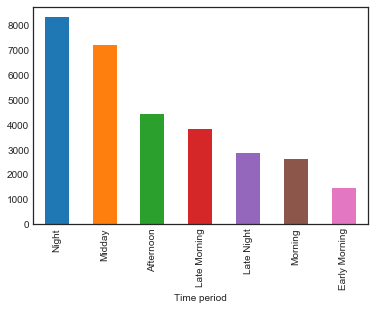

In [32]:
df[(df['SPEED_ZONE']<=60) & (df['SPEED_ZONE']>=50)].groupby('Time period').size().nlargest(10).plot.bar()

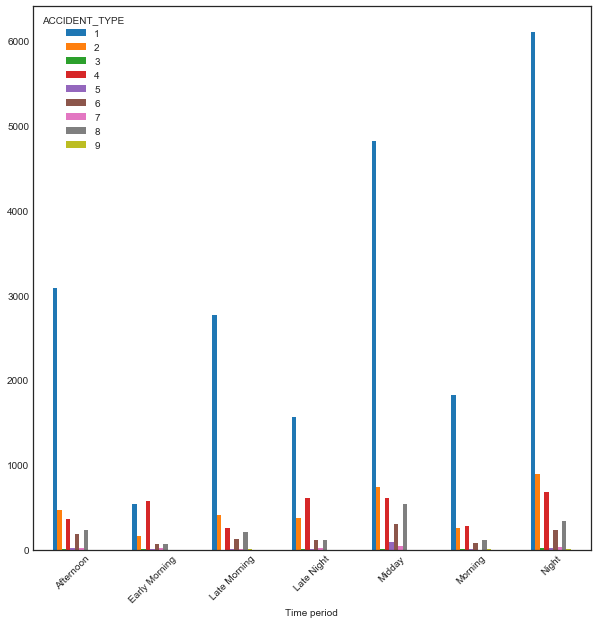

In [33]:
fs = df[(df['SPEED_ZONE']<=60) & (df['SPEED_ZONE']>=50)]

ax1=pd.crosstab(fs['Time period'],fs['ACCIDENT_TYPE']).plot.bar(figsize=(10,10), rot= 45)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

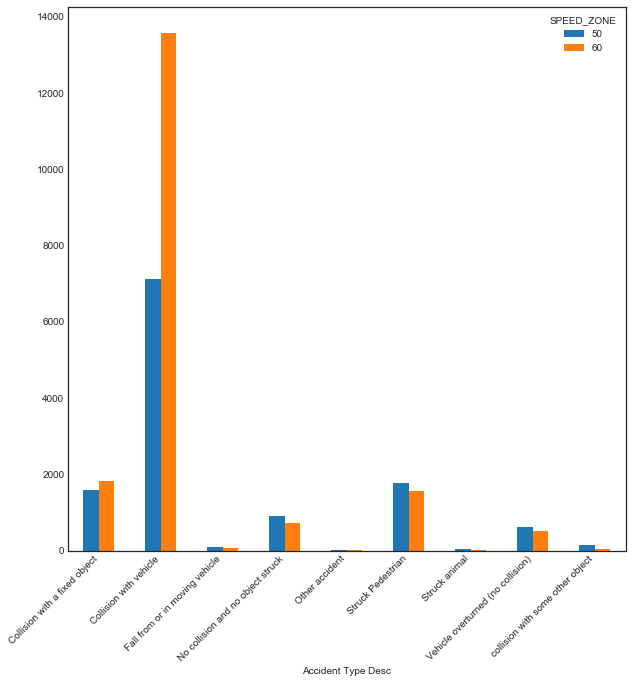

In [34]:
xx=pd.crosstab(fs['Accident Type Desc'],fs['SPEED_ZONE']).plot.bar(figsize=(10,10), rot= 45)
plt.setp(xx.xaxis.get_majorticklabels(), ha='right')

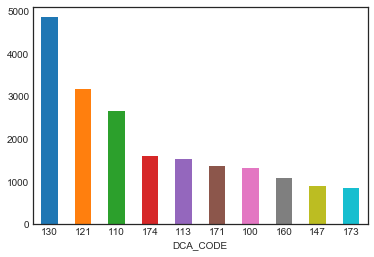

In [35]:
fs.groupby('DCA_CODE').size().nlargest(10).plot.bar(rot=0)

In [36]:
df['ACCIDENTDATE'] =  pd.to_datetime(df['ACCIDENTDATE'], format='%d/%m/%Y')

In [37]:
print(df['ACCIDENTDATE'].nlargest(2),'\n\n',df['ACCIDENTDATE'].nsmallest(2))

4       2036-11-13
55078   2017-12-31
Name: ACCIDENTDATE, dtype: datetime64[ns] 

 7   2006-02-01
2   2006-05-20
Name: ACCIDENTDATE, dtype: datetime64[ns]


In [38]:
df.groupby('DIRECTORY').size().agg(lambda x: x/len(df)*100)

DIRECTORY
        7.824809
MEL    69.406832
VCD     0.014521
VCS    22.730243
dtype: float64

In [39]:
df.groupby('LIGHT_CONDITION').size().agg(lambda x: x/len(df)*100)

LIGHT_CONDITION
1    63.732893
2    11.946854
3    15.204922
4     0.208734
5     5.445239
6     1.020075
9     2.441282
dtype: float64

In [40]:
df.groupby(df['ACCIDENTDATE'].dt.year).size().agg(lambda x: x/len(df)*100)

ACCIDENTDATE
2006     0.014521
2014    26.271463
2015    26.561876
2016    26.336806
2017    20.813519
2036     0.001815
dtype: float64

In [41]:
df.groupby(df['ACCIDENTDATE'].dt.month).size().agg(lambda x: x/len(df)*100)

ACCIDENTDATE
1     7.928268
2     8.501833
3     9.483791
4     8.579882
5     8.986460
6     7.902857
7     8.029913
8     7.933713
9     7.245798
10    8.619813
11    8.420155
12    8.367517
dtype: float64

In [42]:
df.groupby(df['ACCIDENTDATE'].dt.year).agg({'SEVERITY':['mean', 'median'], 
                                            'ACCIDENT_TYPE': ['mean', 'median']})

SEVERITY        ACCIDENT_TYPE       
                  mean median          mean median
ACCIDENTDATE                                      
2006          2.875000      3      1.875000      1
2014          2.655244      3      2.314564      1
2015          2.682588      3      2.283381      1
2016          2.680496      3      2.245210      1
2017          2.715095      3      2.183570      1
2036          3.000000      3      1.000000      1

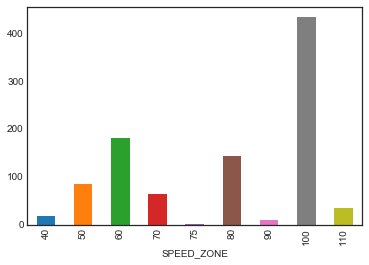

In [43]:
df[(df['SEVERITY']<=1)].groupby('SPEED_ZONE').size().plot.bar()

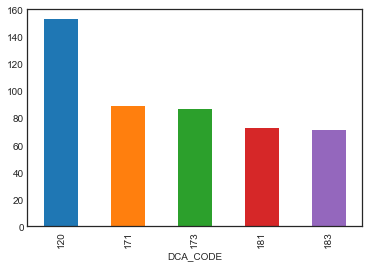

In [44]:
df[(df['SEVERITY']<=1)].groupby('DCA_CODE').size().nlargest(5
                                                           ).plot.bar()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

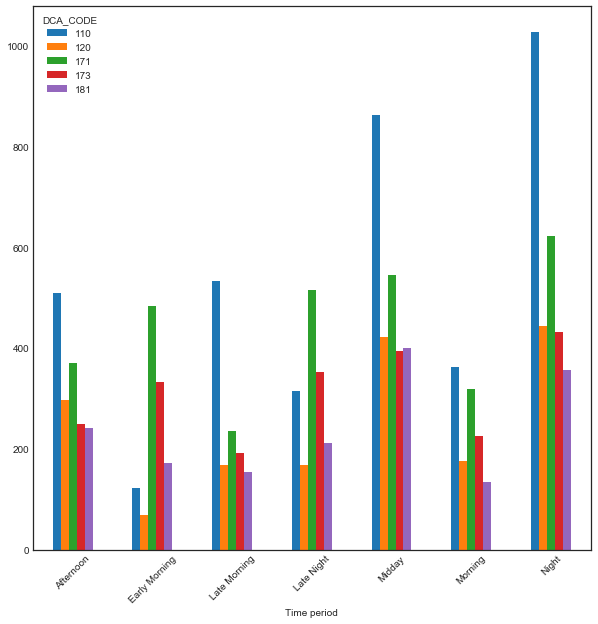

In [45]:
Fatal=df[(df['DCA_CODE'].isin(list(df[(df['SEVERITY']<=1)&(df['SPEED_ZONE']==100)].groupby('DCA_CODE').size().nlargest(5).keys())))]
pd.crosstab(Fatal['Time period'],Fatal['DCA_CODE']).plot.bar(figsize=(10,10), rot= 45)
plt.setp(xx.xaxis.get_majorticklabels(), ha='right')

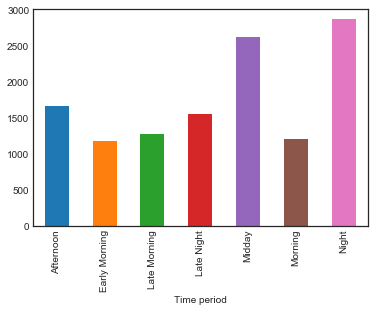

In [46]:
Fatal.groupby('Time period').size().plot.bar()

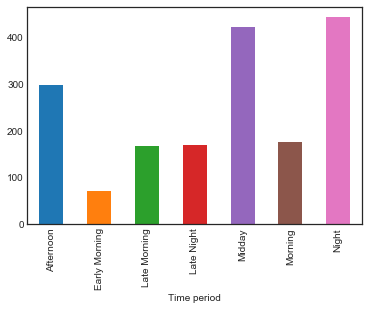

In [47]:
Fatal[(Fatal['DCA_CODE']==120)].groupby('Time period').size().plot.bar()

In [48]:
q=[]
for i in range(len(df)):
    if df['SEVERITY'].iloc[i] == 4:
        q+=[1]
    if df['SEVERITY'].iloc[i] == 3:
        q+=[3]
    if df['SEVERITY'].iloc[i] == 2:
        q+=[7]
    if df['SEVERITY'].iloc[i] == 1:
        q+=[10]

df['Intensity']=q
df['LatLong'] = df[[ 'Lat','Long','Intensity']].values.tolist()

geomap = Map(center= [-37.707136, 144.972364], zoom = 10)
Locations = list(df['LatLong'])
Heat = Heatmap(locations=Locations, radius=8, blur=5)
geomap.add_layer(Heat)
geomap


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [52]:
Fatal=df[(df['DCA_CODE'].isin(list(df[(df['SEVERITY']<=1)&(df['SPEED_ZONE']==100)].groupby('DCA_CODE').size().nlargest(5).keys())))]
fatalmap = Map(center= [-37.707136, 144.972364], zoom = 10)
Locations = list(Fatal['LatLong'])
Heat = Heatmap(locations=Locations, radius=8, blur=5)
fatalmap.add_layer(Heat)
fatalmap

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

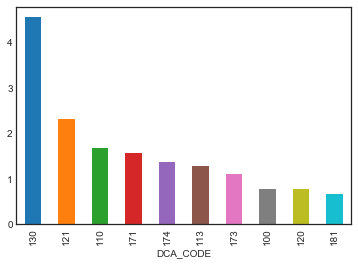

In [69]:

display(
        df[(df['ACCIDENTDATE'].dt.year==2014)].groupby('DCA_CODE').size().nlargest(10).agg(lambda x: x/len(df)*100).plot.bar())


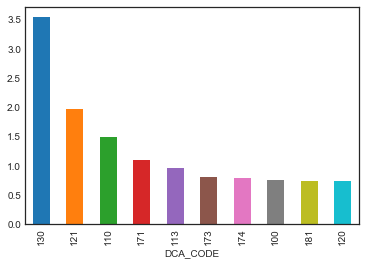

In [70]:
df[(df['ACCIDENTDATE'].dt.year==2017)].groupby('DCA_CODE').size().nlargest(10).agg(lambda x: x/len(df)*100).plot.bar()

No material changes in spread from first and last year